In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Unit root

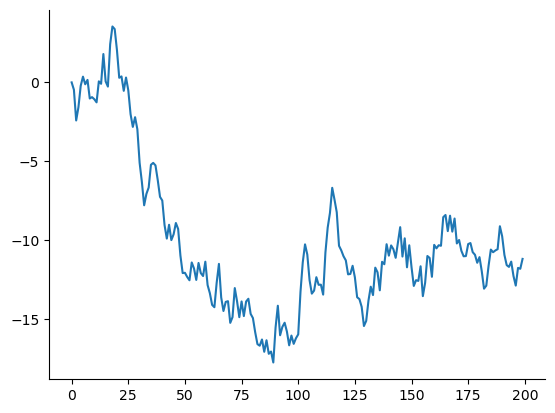

In [94]:
# number of time periods
n = 200
# gen time periods
t = np.arange(n)
# gen time series with unit root
unit_root_series = np.zeros(n)
for i in range(1, n):
    unit_root_series[i] = unit_root_series[i-1] + np.random.normal(0, 1)

plt.plot(t, unit_root_series)
sns.despine()

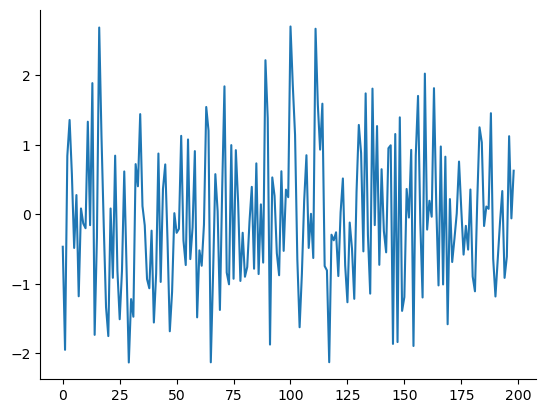

In [95]:
# differencing the unit root timer series and making it stationary 
unit_root_diff = np.diff(unit_root_series)
plt.plot(t[:-1], unit_root_diff)
sns.despine()

### 2. Deterministic trend

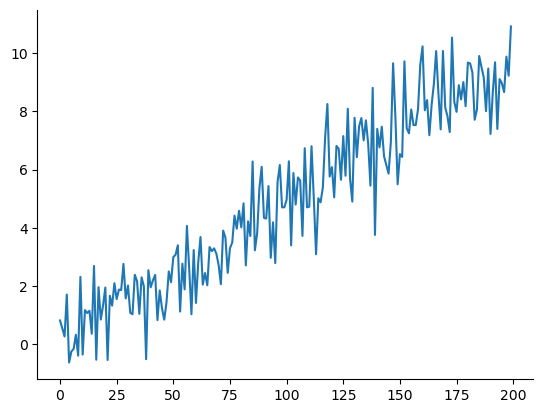

In [96]:
# gen deterministic trend
deter_time_series = 0.05*t + np.random.normal(0,1,n)
plt.plot(t, deter_time_series)
sns.despine()

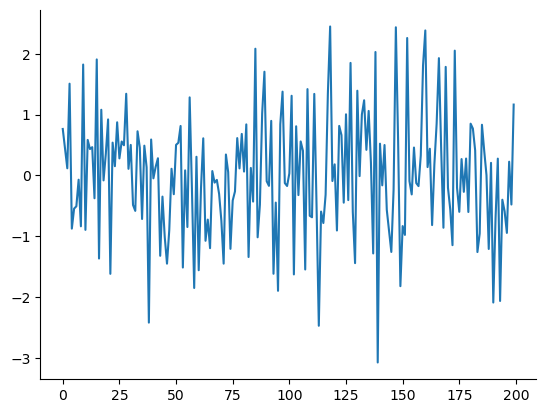

In [97]:
# detrending the deterministic trend time series
from scipy.stats import linregress
slope, intercept, _, _, _ = linregress(t, deter_time_series)
trend = intercept + slope*t
detrend_det = deter_time_series - trend
plt.plot(t, detrend_det)
sns.despine()

### 3. Cyclostationary process

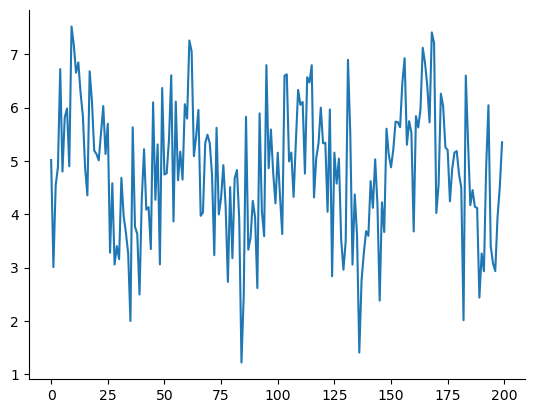

In [106]:
# gen cyclostationary process
cycl_time_series = 5 + np.sin(2*np.pi*t/50) + np.random.normal(0,1,n)
plt.plot(t, cycl_time_series)
sns.despine()

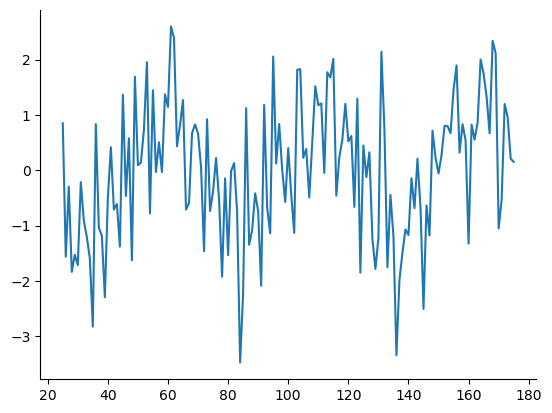

In [111]:
# estimate the cyclic component (mean of the cycle)
rolling_mean = pd.Series(cycl_time_series).rolling(window=50, center=True).mean()
# detrend by substracting the estimate cyclic component
detrend_cyc = cycl_time_series - rolling_mean
plt.plot(t, detrend_cyc)
sns.despine()